## Machine Learning in Python Exercise

**Group 4** - Daguman | Escano | Sagrit | Tanting

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
# sns.color_palette('Set2')

## Exercise: Titanic Dataset

Let's revisit one of your favorite datasets: the Titanic. Similar to the previous exercise, do the following:

 - set the `Survived` column as your target.
 - Split the data into train and test sets. Train set should get 80% of the original set. Test set should get the remaining 20%. Use `random_state = 42` when using sklearn's train-test split function to get consistent results.
 - Train a kNN and linear regression model for this dataset. 
 - Return the score for the test set using the model you trained.
 
Hint! Inspect your data first. You might need to do some preprocessing.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Column Descriptions 
- **PassengerID** - Unique passenger ID
- **Survived** - Determines if passenger survived (yes = 1, no = 0) 
- **Pclass** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name** - Passenger name
- **Sex** - Passenger sex (male, female)
- **Age** - Passenger age 
- **SibSp** - Number of siblings / spouse aboard the Titanic
- **Parch** - Number of parents / children aboard the Titanic
- **Ticket** - Ticket number
- **Fare** - Passenger fare
- **Cabin** - Cabin number 
- **Embarked** - Port of embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)

## *Data Visualization*

Let us perform some data visualization to gain insights into the different columns. For numerical data, we will be visualizing them using histograms. While for categorical data, we will be using bar graphs.

In [ ]:
# Numerical Columns
num_cols = ['Age','SibSp','Parch','Fare']
# Categorical Columns 
cat_cols = ['Survived','Pclass','Sex','Cabin','Embarked']

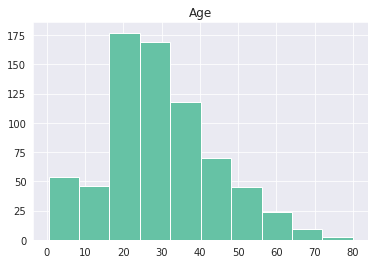

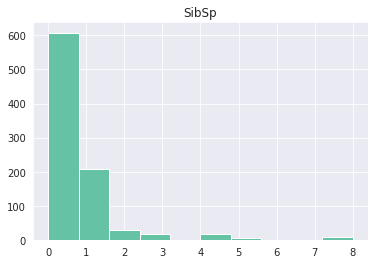

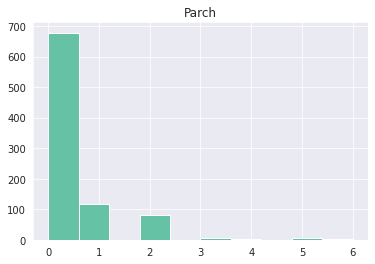

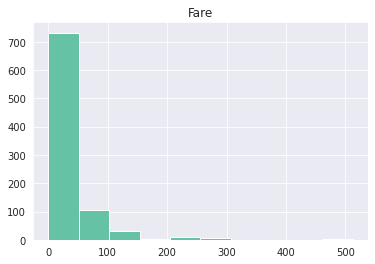

In [ ]:
# Visualize the numerical columns
for i in num_cols:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


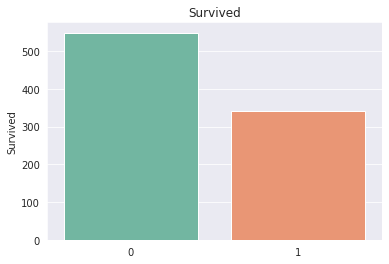

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


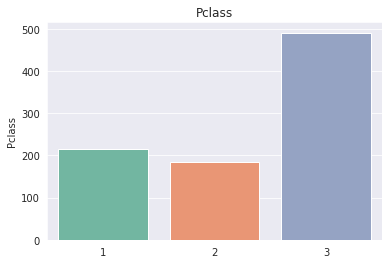

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


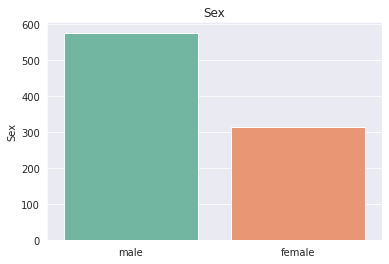

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


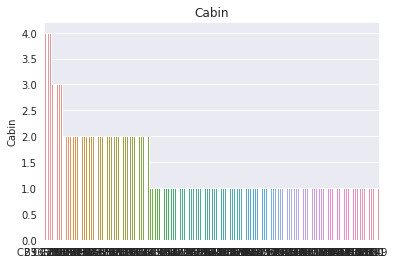

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


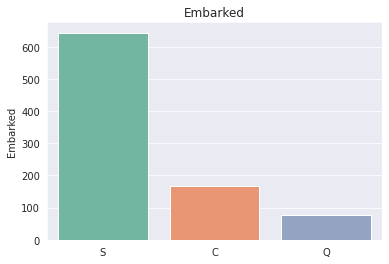

In [ ]:
# Visualize the categorical columns 
for i in cat_cols:
    sns.barplot(df[i].value_counts().index,df[i].value_counts()).set_title(i)
    plt.show()

## *Data Preprocessing*
In this section, we will be preprocessing our data by handling null values, scaling numerical columns, and performing one-hot encoding on the categorical columns.

In [ ]:
#To check if there is a missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that the Age, Cabin, and Embarked columns have null values. Let us perform some preprocessing to handle that. 

From the visualization we performed earlier, we saw that **Age** was right-skewed. In this case, the median serves as a better measure of central tendency. 

In [ ]:
# Create a copy of the original df
df_update = df.copy()

# Calculate the median 
age_median = df["Age"].median(skipna=True)
print("Median value of age is: ", age_median)
# Fill missing values with the median
df_update["Age"] = df["Age"].fillna(age_median)
# Check if there are any missing values
print("Missing age values: ", df_update["Age"].isnull().sum())

Median value of age is:  28.0
Missing age values:  0


As for the **Cabin** column, we see that there are a lot of missing values which makes it hard for data imputation. As such, we will be dropping the column instead. 

In [ ]:
# Check the percentage of missing cabin values
print('Percent of missing "Cabin" records is %.2f%%' %((df['Cabin'].isnull().sum()/len(df))*100))

df_update.drop(columns="Cabin", inplace=True)

Percent of missing "Cabin" records is 77.10%


Meanwhile for **Embarked**, since we are only missing 2 values, we can simply use the most frequent value or the mode to replace the null values. 

In [ ]:
# Get the mode of Embarked
embarked_mode = df_update["Embarked"].mode()[0]
print("Embarked mode is: ", embarked_mode)
df_update["Embarked"] = df_update["Embarked"].fillna(embarked_mode)

Embarked mode is:  S


Additionally, we will also be removing other categorical columns that do not contribute to the machine learning models we will be building later. These columns are **PassengerId**, **Name**, and **Ticket**. 

In [ ]:
# Drop the specified columns 
df_update.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

Next, we will be performing one-hot encoding on the categorical columns such as **Sex**, **Pclass** and **Embarked**. We will be performing this since machine learning models cannot process categorical data directly. 

In [ ]:
df_update = pd.get_dummies(df_update, columns=["Pclass","Embarked","Sex"])

Afterwards, we will be scaling the numerical columns **Age**, **SibSp**, **Parch**, **Fare**. These fields will be scaled since kNN is sensitive to magnitudes which might cause one feature to outweigh another. For this we will be using the MinMaxScaler to transform the numerical columns to values between 0 to 1.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()
# Create scaled df
df_scaled = df_update.copy()

df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

Finally, let's re-check our dataframe for any null values.

In [ ]:
df_scaled.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

In [ ]:
df_scaled

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0.271174,0.125,0.000000,0.014151,0,0,1,0,0,1,0,1
1,1,0.472229,0.125,0.000000,0.139136,1,0,0,1,0,0,1,0
2,1,0.321438,0.000,0.000000,0.015469,0,0,1,0,0,1,1,0
3,1,0.434531,0.125,0.000000,0.103644,1,0,0,0,0,1,1,0
4,0,0.434531,0.000,0.000000,0.015713,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.000,0.000000,0.025374,0,1,0,0,0,1,0,1
887,1,0.233476,0.000,0.000000,0.058556,1,0,0,0,0,1,1,0
888,0,0.346569,0.125,0.333333,0.045771,0,0,1,0,0,1,1,0
889,1,0.321438,0.000,0.000000,0.058556,1,0,0,1,0,0,0,1


In [ ]:
df_scaled.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.363679,0.065376,0.063599,0.062858,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.352413,0.647587
std,0.486592,0.163605,0.137843,0.134343,0.096995,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990,0.477990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## *Testing with KNN*

K-nearest Neighbors is applied to cluster data points at a given number of K based on a similar metric. This means that a given number K, the KNN will predict the points nearest to point X and it will be assigned as predictor of the dataset or in this exercise, those who *survived and did not survive*.

<br> Before doing the KNN algorithm, we included the following packages:


In [ ]:
#Important packages for k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier #for getting KNN Score
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.metrics import accuracy_score #for getting accuracy score
from sklearn import metrics #for getting metrics score

From the given, we set `survive` as the target variable. The `train_test_split` function will make random partition for train data and the test data. This is an important step to prevent overfitting and underfitting of the model (or too inaccurate). The details of the `train_test_split` are as follows:

*   X_train - all independent variables
*   X_test - a portion of the independent variables used to make predictions to test the accuracy of the model
*   y_train - dependent variable that needs to be predicted by the model
*   y_test - a portion of the dependent varaible to test the accuracy between actual and predicted categories

At `random_state=42`, it will act as the *random sampling* of the data and it will decide the splitting of data into train and test sets



In [ ]:
#Set survive as the target
target = 'Survived'
X = df_scaled.drop(target, axis=1)
y = df[target]

#Conduct random sampling through train-test split to prevent overfitting/underfitting of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

There are two proccesses to assign the optimal value of K. First, we compute for a random K-value at a given range. In this case, we have assigned the `range` to 1 to 40 and we expect that it will print 40 scores to choose from. 

In [ ]:
#Determine the optimal value of K in a given range of accuracy scores
k_range = range(1,40)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.7877094972067039, 0.8156424581005587, 0.7821229050279329, 0.7877094972067039, 0.8044692737430168, 0.8044692737430168, 0.8100558659217877, 0.7877094972067039, 0.8044692737430168, 0.7988826815642458, 0.8044692737430168, 0.7988826815642458, 0.8044692737430168, 0.7932960893854749, 0.7988826815642458, 0.7988826815642458, 0.8044692737430168, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7988826815642458, 0.7988826815642458, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7653631284916201, 0.7653631284916201, 0.7653631284916201, 0.770949720670391, 0.7653631284916201, 0.7653631284916201]


Second, from the given scores, we find out the optimal value of K at a given error rate. We can prove this by deriving a graph of the error rate and the K-value. This is important since we want to eliminate errors in predicting the KNN score. We summarized this in the graph below:

Minimum error:- 0.18435754189944134 at K = 1


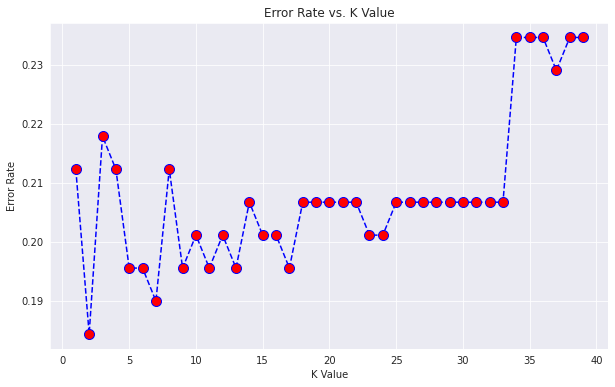

In [ ]:
#Determine the optimal value of K at a given error rate. The lowest error rate will be the K-value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

#Plot the optimal value of K at a given error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

The graph shows that the minimum error is evident at 0.1844 at K=1. This means that K=1 is the preferred K-value in the KNN algorithm. We then proceed in training the model and predict the KNN score. 

In [ ]:
#Train model and predict
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy of the Model at K=1 is {:.4%}".format(accuracy))

Accuracy of the Model at K=1 is 78.7709%


The score implies that the KNN algorithm has the capacity to predict the population of those who survived and did not survived the Titanic by 0.7877 or 78.7709%. This is derived from the dataset that has been scaled in the pre-processing stages in the exercise. However, it brings a question if this is accurate enough if we did not scale the dataset in the first place. If the dataset has not been scaled, will it also yield the same results?

[0.6815642458100558, 0.6983240223463687, 0.7094972067039106, 0.7094972067039106, 0.7262569832402235, 0.7318435754189944, 0.7262569832402235, 0.7039106145251397, 0.7039106145251397, 0.7094972067039106, 0.7374301675977654, 0.7150837988826816, 0.7150837988826816, 0.7262569832402235, 0.7262569832402235, 0.7374301675977654, 0.7374301675977654, 0.7206703910614525, 0.7150837988826816, 0.7150837988826816, 0.7206703910614525, 0.7262569832402235, 0.7150837988826816, 0.7094972067039106, 0.7206703910614525, 0.7039106145251397, 0.7206703910614525, 0.7094972067039106, 0.7039106145251397, 0.6927374301675978, 0.6983240223463687, 0.7039106145251397, 0.6983240223463687, 0.6927374301675978, 0.6927374301675978, 0.6927374301675978, 0.7039106145251397, 0.7094972067039106, 0.6983240223463687]
Minimum error:- 0.26256983240223464 at K = 10


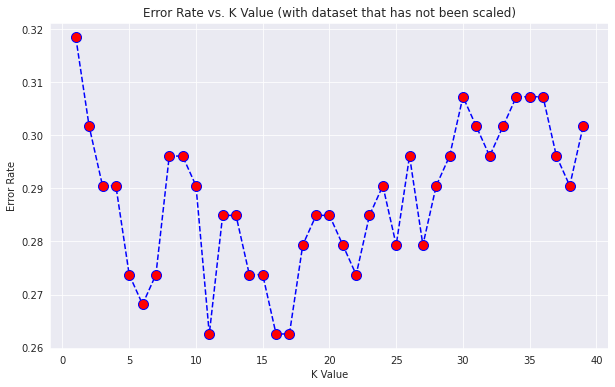

In [ ]:
#Set survive as the target from a dataset that has not been scaled
target = 'Survived'
X = df_update.drop(target, axis=1)
y = df[target]

#Conduct random sampling from a dataset that has not been scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Determine the optimal value of K in a given range of accuracy scores
k_range = range(1,40)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

#Determine the optimal value of K at a given error rate from a dataset that has not been scaled
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

#Plot the error rate vs K value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value (with dataset that has not been scaled)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [ ]:
#Train model and predict the accuracy of KNN (that is not scaled)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy of the Model at K=10 is {:.4%}".format(accuracy))

Accuracy of the Model at K=10 is 68.1564%


The result from a KNN model with a dataset that has not been scaled yielded a lower KNN score of 0.68156 or 68.1564%. Notice that the error term in this scenario is higher at a value of 0.26257. Recall that the accuracy of the model was higher when the dataset was scaled and it yielded a higher accuracy score of 78.7709% with a lower error term of 0.1844 . The comparison of scores only imply that scaling the dataset is important for conducting KNN to yield higher and accurate results. This is because distance-based algorithms like KNN are affected by the scale of the variables in the dataset. We are trying to prevent that our algorithm will not be affected by the magnitude of the variables. Through the `MinMaxScaler` we have done earlier, it increases the score by about 10%. Thus, scaling is necessary to apply to avoid missclassification.

###***Limitations of KNN Algorithm in this Exercise***

We have observed that the results of the KNN algorithm heavily depends on the preprocessing methods that were done. KNN may generate inaccuracy in the predictions if scaling  of the dataset is not applied.  Moreover, other than the preprocessing we have done in this exercise, we observed few limitations of the KNN: 

1. Determinng the optimal number of K-values will be harder on a larger dataset. Accuracy is questionable given that that data is randomly spread and it will not yield useful information for analysis.

2. The risk of sensitivity of the outliers are high. That is why data processing is very important.

2. Aside from the preprocessing, the exercise could have imporved on applying distance metrics (ie. Eucledian Distance or Minowski Distance). In the exercise, we have pointed out the position of the optimal K-value, but we did not measure the distance of the K-values. By applying distance metrics, it could measure the distance between points which can help quantify similarity among K-values. 

## *Testing with Logistic Regression*
In testing the dataset with the linear regression,  we must recognize the nature of the dependent variable, in which in this case it is the target variable `survived`. Notice that other variables in the dataset are binary such as the `sex`, `embarked`, and `p-class`. Hence, a logit model or logistic regression is applied in this case. A logistic regression is used to determine the predict the probability whether Titanic passangers have survived or not. This will be appropriate for this case since the dependent variable of interest is dichotomous wherein it takes the value of 1 if the passenger have survived, and 0 if the passenger have not survived. The basis of the model is found in the equation below:

![picture](https://www.dotnetlovers.com/images/LogisticRegressionFormula1020201890212AM.png)

where P is denoted as the target variable that varies from 0 to 1, and the right-hand side of the equation are the independent varaibles.

<br> Before modelling, the following packages are included in testing the logit regression

In [ ]:
#Importing packages for logit modelling
from sklearn.linear_model import LogisticRegression #for Logistic Regression
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.metrics import confusion_matrix #for visualizing the confusion matrix
from sklearn.metrics import roc_auc_score # for roc score
from sklearn.metrics import roc_curve #for visualizing the roc curve

Set the column `survived` as the target or the target variable from the scaled version of the dataset.

In [ ]:
#Set survive as the target
target = 'Survived'
X = df_scaled.drop(target, axis=1)
y = df[target]

The data was split into train and test sets. From the given, it was stated that the test set would get the remaining 20%. In this case, the `test_size` was set to 0.2. In using the train-test split function, the `random_state` equates to 42.

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After splitting, the dataset is ready for modelling. The results of the regression score and the number of survived and did not survive are as follows:

In [ ]:
#Train model and predict with logit regression:
logit = LogisticRegression(random_state=42, max_iter=1000)
logit.fit(X_train, y_train)
score = logit.score(X_test, y_test)

#Print results
print(f'Logistic Regression Score: {score:.4%}')

#Predicting the number of survived and did not survived
predscore = logit.predict(X_test)
print("Survived:", sum(predscore!=0))
print("Did not Survived:", sum(predscore==0))

Logistic Regression Score: 79.8883%
Survived: 68
Did not Survived: 111


A Logistic Regression Score of `79.8883%` showed the accuracy of the modelling. It is also interesting to note that from the prediction, we can see that the number of people that **did not** survived in the Titatnic amounted to `111` compared to the number of people who surived at `68`.

<br> But what if the data we used is not scaled? We show a comparison that it is not affected and the score remains the same at 79.8883%



In [ ]:
#Set survive as the target with the dataset not scaled
target = 'Survived'
x = df_update.drop(target, axis=1)
Y = df[target]

#Train test split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

#Modelling logit regression:
logit_notscaled = LogisticRegression(random_state=42, max_iter=1000)
logit_notscaled.fit(x_train, Y_train)
score = logit_notscaled.score(x_test, Y_test)

#Calculating Regression Score when the data is not scaled
print(f'Logistic Regression Score (not scaled): {score:.4%}')


Logistic Regression Score (not scaled): 79.8883%


In analyzing the regression score further, a confusion matrix can be applied for model evaluation. It summarizes if the model accurately predict those who have lived (or survived) and died (who did not survived). The matrix is divided into 4 quadrants, the true positive (TP), false positives (FP), false negatives (FN), and true negatives (TN). Here is a guide for understanding:

![picture](https://miro.medium.com/max/1334/1*3yGLac6F4mTENnj5dBNvNQ.jpeg)

*Taken from Suresh, A. (2020)*

For this exercise, we have provided a visualization of the confusion matrix below:

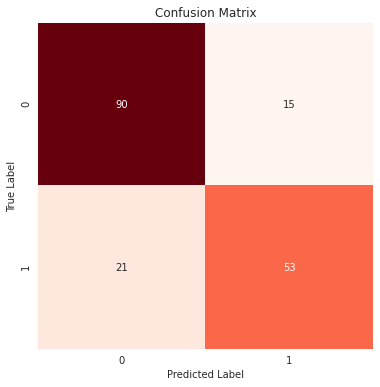

In [ ]:
#Determine the confusion matrix
cm = confusion_matrix(y_test, predscore)

#Visualizing the Confusion Matrix
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

From the matrix, it showed that the model accurately identified that 90 individuals from the Titanic survived, but 15 individuals who were thought to have survived actually died (at type 1 error). Likewise, 21 of those predicted to have not survived actually lived (at type 2 error). And 53 individuals who did not survive were accurately predicted. Moreover, the values from the TP and TN quadrants (90 and 53, respectively) are of higher than the values in FP and FN quadrants (15 and 21, respecitvely). It implies that high TP and TN values are an indicator of a good model (Suresh, 2020). 

<br> Another way to visualize the logistic regression results is through the Receiver Operating Characteristics (ROC) curve. The curve plots the true positive rate and the false positive rate. In the graph shown below, the blue curve indicates the model's performance. The red dotted line is the random classifier. Note that the further the blue curve from the red dotted line, the better the model in distinguishing who survived and did not survived

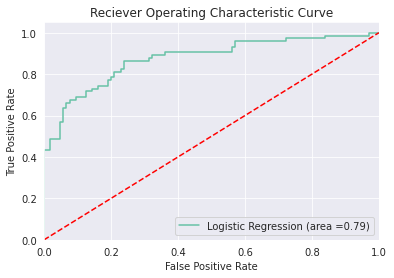

In [ ]:
#Get ROC value
logit_roc_auc = roc_auc_score(y_test, logit.predict(X_test)) #Determine the ROC score
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1]) #Establish the ROC threshold line

#Visualizing the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area =%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

### ***Limitations of the Logit Modelling in this Exercise***
Model validation techniques in statistics must be applied when running regression models. It is important to be ascertain whether predicted values from the model will accurately predict responses on future subjects to develop the model. Aside from the model evaluation we have done, we have summarized the limitations we have observed in doing this exercise:

1. Robustness check (goodness of fit test) of the data will determine whether the model is acceptable for its intended use, especially for logit models. An example of this is the *Hosmer-Lemeshow goodness of fit test* to calculate if the observed event rates match the expected event rates.

2. Cross-validation scores to see the range of accuracy scores that may be applied for future modelling.



## *Challenges Encountered*

1. Preprocessing is very important. Results vary if the data is heavily skewed. This is evident in conducting KNN algorithms and logistic regression to prevent misclassification and overfitting/underfitting of the data analysis. From the results, we can see that there is a noticeable difference between the results of the models when using scaled vs non-scaled data.

2. There are different ways to pre-process data that is complete and those that have null-values. We can't simply replace all of the null values with a single-value let's say zero. We also have to take into account the distribution of the data when imputing our data. For a right-skewed distribution, then the median might be a better measure of central tendency. The number of null-values for a column should also be a consideration since if we have too much null-values then we can consider dropping the column. 

3. Not all features are also needed for the machine learning model. So we have to take into account which features actually contribute to the model before including them in training the model. For example, the **passengerID** and **name** columns don't really bring anything to the table when it comes to determining the passenger's survivability. As opposed to something like the passenger's sex or age where it was likely that women and children were given priority in the evacuation of the ship. 

**Reference**


Suresh, A. (2020). What is a Confusion Matrix? Retrieved from https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

###-End-